# Healthcare Dataset Analysis

Exploring and answering specific questions using a synthetic healthcare dataset retrieved from [P. Patil's kaggle](https://www.kaggle.com/datasets/prasad22/healthcare-dataset) and following some of the exploratory coding done by [M. Furqan](https://www.kaggle.com/code/muhammadfurqan0/unlocking-healthcare-trends-data-analysis/notebook).

Synthetic dataset of 55,500 x 15 includes equally distributed data on patient demographics, patient health and care, and healthcare providers.


In [175]:
# # unzip dataset
# from zipfile import ZipFile

# with ZipFile("../Data/healthcare_dataset.csv.zip") as zfile:
#     zfile.extractall("../Data")

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px # px plots are interactive, can hover more detailed info


# Load Dataset + Explore Structure

In [177]:
df = pd.read_csv("../Data/healthcare_dataset.csv")
print(df.shape)
df.head(10)


(55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [195]:
# df.describe()
df.info()
# no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Name                55500 non-null  object         
 1   Age                 55500 non-null  int64          
 2   Gender              55500 non-null  object         
 3   Blood Type          55500 non-null  object         
 4   Medical Condition   55500 non-null  object         
 5   Date of Admission   55500 non-null  datetime64[ns] 
 6   Doctor              55500 non-null  object         
 7   Hospital            55500 non-null  object         
 8   Insurance Provider  55500 non-null  object         
 9   Billing Amount      55500 non-null  float64        
 10  Room Number         55500 non-null  int64          
 11  Admission Type      55500 non-null  object         
 12  Discharge Date      55500 non-null  datetime64[ns] 
 13  Medication          55500 non-n

In [179]:
# convert dates to datetime, can perform calculations
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"])

In [180]:
df.describe()
# by default only includes numeric cols, have to specify other col types
df.describe(include =("int64", "object", "float64", "datetime"))#.T # transpose, now each original col is a row

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,NaN,40341,39876,5,NaN,NaN,3,NaN,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,NaN,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,NaN,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,NaN,27,44,11249,NaN,NaN,18655,NaN,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,2021-11-01 01:02:22.443243008,NaN,NaN,NaN,25539.316097,301.134829,NaN,2021-11-16 13:15:20.821621504,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,2019-05-08 00:00:00,NaN,NaN,NaN,-2008.492140,101.000000,NaN,2019-05-09 00:00:00,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,2020-07-28 00:00:00,NaN,NaN,NaN,13241.224652,202.000000,NaN,2020-08-12 00:00:00,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,2021-11-01 00:00:00,NaN,NaN,NaN,25538.069376,302.000000,NaN,2021-11-17 00:00:00,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,2023-02-03 00:00:00,NaN,NaN,NaN,37820.508436,401.000000,NaN,2023-02-18 00:00:00,NaN,NaN
max,NaN,89.000000,NaN,NaN,NaN,2024-05-07 00:00:00,NaN,NaN,NaN,52764.276736,500.000000,NaN,2024-06-06 00:00:00,NaN,NaN


In [181]:
df["Blood Type"].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [182]:
# inconsistent casing in name entries --> reformat
df["Name"] = df["Name"].apply(lambda x: x.title())
df["Name"].head(20)

# remove titles from names, Ms. Dr. etc


0           Bobby Jackson
1            Leslie Terry
2             Danny Smith
3            Andrew Watts
4           Adrienne Bell
5           Emily Johnson
6          Edward Edwards
7      Christina Martinez
8         Jasmine Aguilar
9        Christopher Berg
10       Michelle Daniels
11         Aaron Martinez
12          Connor Hansen
13           Robert Bauer
14           Brooke Brady
15     Ms. Natalie Gamble
16          Haley Perkins
17    Mrs. Jamie Campbell
18           Luke Burgess
19         Daniel Schmidt
Name: Name, dtype: object

# Visualise distributions 

Text(0, 0.5, 'Count')

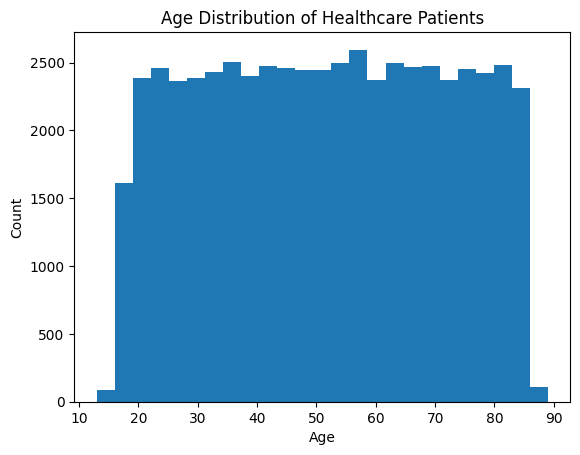

In [183]:
# plot Age
plt.hist(df["Age"], bins=25)
plt.title("Age Distribution of Healthcare Patients")
plt.xlabel("Age")
plt.ylabel("Count")

In [184]:
# visualise object-type columns 

obj_cols=df.describe(include="object").columns.tolist()
# remove cols w large number of unique entries
obj_cols.remove("Name")
obj_cols.remove("Doctor")
obj_cols.remove("Hospital")


In [185]:
# obj_cols = df.describe(include="object").columns.tolist()
for col in obj_cols:
    fig = go.Figure()
    # open figure for this col
    # want to iteratively add data to the same figure

    for (item, count) in df[col].value_counts().items(): # returns each unique col_element + its frequency    
    #     plt.bar(item, count)
    # plt.title(f"Distribution of {col}")
    # plt.xlabel(col)
    # plt.ylabel("Count")
    # plt.show()
        fig.add_trace(go.Bar(x=[item], y=[count], name=item))
    fig.update_layout(title=f"Distribution of {col}", xaxis_title = col, yaxis_title='Count')
    fig.show()


# Solve specific questions

### what is the most common medical condition associated w each blood type?


In [186]:
# what is the most common medical condition associated w each blood type?

btypes = df["Blood Type"].unique().tolist()
btype_medc_df = pd.DataFrame()
for i in btypes:
    df_i= df[df["Blood Type"]==i]
    i_des = df_i.describe(include =("object"))
    i_medC = i_des["Medical Condition"].top
    imedC_count = i_des["Medical Condition"].freq 
    print("The top medical condition for blood type", i, "is", i_medC, "with", imedC_count, "occurrences.")
    btype_medc_df[i] = i_medC, imedC_count

btype_medc_df.head() 


The top medical condition for blood type B- is Obesity with 1188 occurrences.


The top medical condition for blood type A+ is Diabetes with 1213 occurrences.
The top medical condition for blood type A- is Hypertension with 1199 occurrences.
The top medical condition for blood type O+ is Arthritis with 1198 occurrences.
The top medical condition for blood type AB+ is Hypertension with 1215 occurrences.
The top medical condition for blood type AB- is Cancer with 1198 occurrences.
The top medical condition for blood type B+ is Arthritis with 1201 occurrences.
The top medical condition for blood type O- is Obesity with 1157 occurrences.


,B-,A+,A-,O+,AB+,AB-,B+,O-
0,Obesity,Diabetes,Hypertension,Arthritis,Hypertension,Cancer,Arthritis,Obesity
1,1188,1213,1199,1198,1215,1198,1201,1157


### which dr is the most common attending to asthma patients?


In [187]:
# which dr is the most common attending to asthma patients?

df_asth = df[df["Medical Condition"]== "Asthma"]
df_asth.describe(include="object")["Doctor"].top

'Robert Smith'

### what is the average length of patient stay? what is the range of stays?


In [188]:
# what is the average length of patient stay? what is the range of stays?

df["Stay"] = df["Discharge Date"] - df["Date of Admission"]
print(f"Average stay: {df["Stay"].mean()}")
print(f"Range of stay lengths: {df["Stay"].min().days} to {df["Stay"].max().days} days")

Average stay: 15 days 12:12:58.378378378
Range of stay lengths: 1 to 30 days


### what is the average age for each medical condition?


  Medical Condition        Age
0         Arthritis  51.565320
1            Asthma  51.575830
2            Cancer  51.558795
3          Diabetes  51.554170
4      Hypertension  51.741915
5           Obesity  51.240277


Text(0, 0.5, 'Average Age')

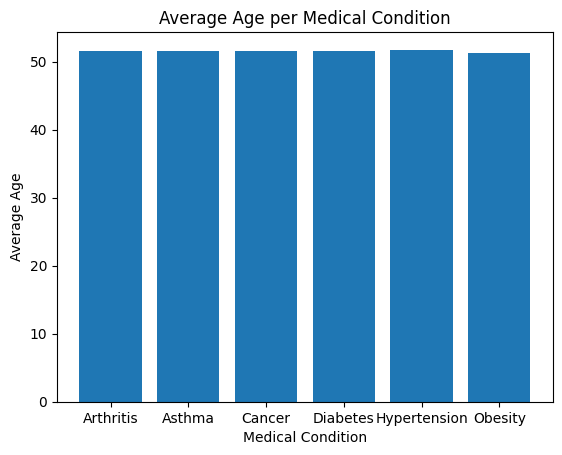

In [189]:
# what is the average age for each medical condition?

# .groupby("grouping_col")["indexing_col"]
age_by_condition = df.groupby('Medical Condition')['Age'].mean().reset_index()
print(age_by_condition)
# plot
plt.bar(age_by_condition['Medical Condition'], age_by_condition['Age'])
plt.title("Average Age per Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Average Age")


### how frequently is each medication given for each medical condition?


In [190]:
# how frequently is each medication given for each medical condition?

med_by_condition = df.groupby(["Medication", "Medical Condition"]).size().reset_index(name="Count")
# .groupby([group1_col, group2_col]) for multiple groupings 
# .size() = count for groups

# # plot
px.bar(med_by_condition, "Medical Condition", "Count", color="Medication", barmode='group',
       title = 'Medication Allocation per Medical Condition')


### frequency of admission type for each gender?

In [191]:
# frequency of admission type for each gender?

# df.groupby([group1_col, group2_col]).size().reset_index(name='name_of_count_col')
gender_admit = df.groupby(["Gender", "Admission Type"]).size().reset_index(name="Count")
# plot
px.bar(gender_admit, "Gender", "Count", color="Admission Type", barmode = 'group',
    # if dont specify barmode= , will make vertically connected bars that summate to total x group freq
    title=("Types of Admission by Gender"))

In [192]:
# what confounding variables are significant indicators of abnormal test results?



In [ ]:
# is there any correlation bw length of stay and test results? 

